In [1]:
import pandas as pd

df = pd.read_csv("DATASET-balanced.csv")

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

print(X.head(10))
print(y.head(10))

   chroma_stft       rms  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.338055  0.027948        2842.948867         4322.916759  6570.586186   
1     0.443766  0.037838        2336.129597         3445.777044  3764.949874   
2     0.302528  0.056578        2692.988386         2861.133180  4716.610271   
3     0.319933  0.031504        2241.665382         3503.766175  3798.641521   
4     0.420055  0.016158        2526.069123         3102.659519  5025.077899   
5     0.442880  0.012317        3952.880304         3702.717829  7104.089991   
6     0.453897  0.021782        4178.072150         3698.644769  7508.242075   
7     0.474154  0.011107        3993.039753         3948.154333  7872.563956   
8     0.602690  0.000970        3815.431438         3992.517515  6887.564689   
9     0.453962  0.017612        2894.560788         3435.434131  5663.232422   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.041050 -462.169586   90.3112

In [2]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y)
y = lb.transform(y)
y = y.ravel()
print(y)

[0 0 0 ... 1 1 1]


In [122]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=18, random_state=1)

from sklearn.model_selection import KFold
kf = KFold(n_splits=5,  shuffle=True, random_state=1)

print(model)
print("KFold splits: " + str(kf.get_n_splits(X)))

RandomForestClassifier(n_estimators=18, random_state=1)
KFold splits: 5


In [123]:
import time

import numpy as np

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

acc_score = []
prec_score = []
rec_score = []
f1s = []
MCCs = []
ROCareas = []
acc_train=[]
acc_test=[]
start = time.time()
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
    acctrain=model.score(X_train,y_train)
    acc_train.append(acctrain)
    acctest=model.score(X_test,y_test)
    acc_test.append(acctest)
    prec = precision_score(y_test , pred_values, average="binary", pos_label=1)
    prec_score.append(prec)
    
    rec = recall_score(y_test , pred_values, average="binary", pos_label=1)
    rec_score.append(rec)
    
    f1 = f1_score(y_test , pred_values, average="binary", pos_label=1)
    f1s.append(f1)
    
    mcc = matthews_corrcoef(y_test , pred_values)
    MCCs.append(mcc)   
    
    roc = roc_auc_score(y_test , pred_values)
    ROCareas.append(roc)
    
end = time.time()
timeTaken = (end - start)
print("Model trained in: " + str( round(timeTaken, 2) ) + " seconds.")

Model trained in: 3.07 seconds.


In [124]:
print("Mean results and (std.):\n")
print("Accuracy: " + str( round(np.mean(acc_score)*100, 3) ) + "% (" + str( round(np.std(acc_score)*100, 3) ) + ")\n")
print("Precision: " + str( round(np.mean(prec_score), 3) ) + " (" + str( round(np.std(prec_score), 3) ) + ")")
print("Recall: " + str( round(np.mean(rec_score), 3) ) + " (" + str( round(np.std(rec_score), 3) ) + ")")
print("F1-Score: " + str( round(np.mean(f1s), 3) ) + " (" + str( round(np.std(f1s), 3) ) + ")")
print("MCC: " + str( round(np.mean(MCCs), 3) ) + " (" + str( round(np.std(MCCs), 3) ) + ")")
print("ROC AUC: " + str( round(np.mean(ROCareas), 3) ) + " (" + str( round(np.std(ROCareas), 3) ) + ")")
print(acc_train)
print(acc_test)

Mean results and (std.):

Accuracy: 98.259% (0.275)

Precision: 0.992 (0.002)
Recall: 0.973 (0.005)
F1-Score: 0.982 (0.003)
MCC: 0.965 (0.005)
ROC AUC: 0.983 (0.003)
[1.0, 0.9998938654213543, 0.9997877308427086, 0.9998938766847076, 0.9997877533694153]
[0.9838709677419355, 0.9783531409168081, 0.983446519524618, 0.9808917197452229, 0.986411889596603]


In [125]:
def extract_features(file_path, mfcc=True, chroma=True, mel=True):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    features = []
    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13), axis=1)
        features.extend(mfccs)
    if chroma:
        chroma = np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate), axis=1)
        features.extend(chroma)
    if mel:
        mel = np.mean(librosa.feature.melspectrogram(y=audio, sr=sample_rate), axis=1)
        features.extend(mel)
    return features

In [128]:
import librosa

In [189]:
file_path = 'AUDIO/real/biden-original.wav'
audio_features = extract_features(file_path)

In [180]:
X_array = np.array(audio_features)

In [181]:
X_reshaped = X_array.reshape(1, -1)

In [190]:
X_trimmed = audio_features[:26]

# Convert the list to a NumPy array
X_array = np.array(X_trimmed)

# Reshape the array to have the correct shape
X_reshaped = X_array.reshape(1, -1)

In [191]:
y_pred=model.predict(X_reshaped)

C:\Users\minai\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [192]:
y_pred

array([0])

In [193]:
if y_pred[0] == 'real':
    print("The audio is classified as real.")
else:
    print("The audio is classified as fake.")

The audio is classified as fake.


In [6]:
model.score(X_train,y_train)

1.0

In [7]:
model.score(X_test,y_test)

0.9868365180467091

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
model1=GradientBoostingClassifier()

In [21]:
model1.fit(X_train,y_train)

GradientBoostingClassifier()

In [24]:
model1.score(X_train,y_train)

0.9808978032473734

In [25]:
model1.score(X_test,y_test)

0.970276008492569

In [26]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [27]:
model2=HistGradientBoostingClassifier()

In [28]:
model2.fit(X_train,y_train)

HistGradientBoostingClassifier()

In [29]:
model2.score(X_train,y_train)

1.0

In [30]:
model2.score(X_test,y_test)

0.9906581740976645

In [78]:
from sklearn.linear_model import LassoLars

In [79]:
model3=LassoLars()

In [80]:
model3.fit(X_train,y_train)

LassoLars()

In [81]:
model3.score(X_train,y_train)

0.31185219105005346

In [82]:
model3.score(X_test,y_test)

0.33593010489120545

In [ ]:
np.reshape

In [633]:
import librosa
import numpy as np

def extract_features(audio_file):
    y, sr = librosa.load(audio_file, sr=None)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)[:1]
    rms = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

    # Stack features vertically
    features = np.vstack([chroma_stft, rms, spectral_centroid, spectral_bandwidth, rolloff, zero_crossing_rate, mfccs])

    # Take the mean along the feature axis
    features = np.mean(features, axis=1)
    print(chroma_stft.shape,rms.shape,spectral_bandwidth.shape,spectral_centroid.shape,rolloff.shape,zero_crossing_rate.shape,mfccs.shape)

    return features


In [804]:
extracted_features = extract_features("linus-to-musk-DEMO.mp3")
extracted_features = extracted_features.reshape(1, -1)

(1, 212) (1, 212) (1, 212) (1, 212) (1, 212) (1, 212) (20, 212)


In [805]:
extracted_features.shape


(1, 26)

In [806]:
extracted_features_df = pd.DataFrame(extracted_features, columns=X_train.columns)

In [807]:
extracted_features_df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.332852,0.088791,2883.6795,2246.046362,5067.917158,0.09036,-335.64507,116.46705,-24.592061,3.085677,...,-10.656098,-1.919143,-3.255195,-6.498252,-6.000805,-11.073718,-8.660345,0.071092,-8.09366,-13.050543


In [808]:
prediction = model.predict(extracted_features_df)

In [816]:
prediction.repeat(1)

array([0])

In [817]:
lb.inverse_transform(prediction)

array(['FAKE'], dtype='<U4')

In [741]:
import numpy as np

# Assuming 'extracted_features' is your input with shape (1, 26, 56)
o=extracted_features[:56291]
o.shape

(1, 26)

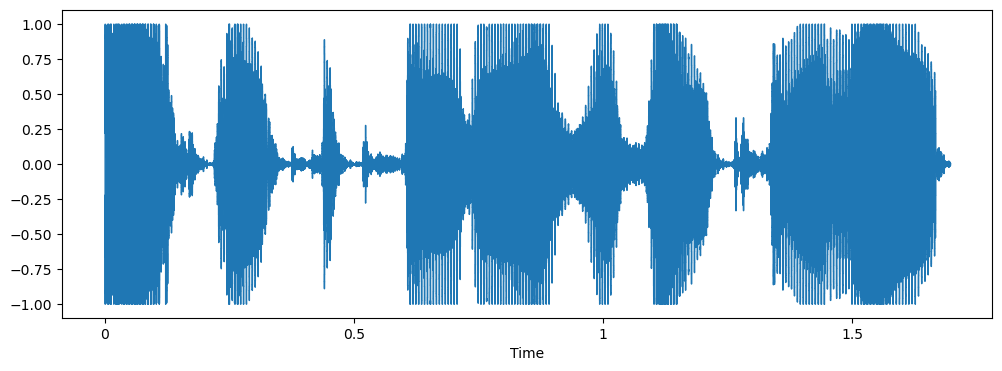

In [595]:
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load('AUDIO/REAL/trump-original.wav', sr=None)
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

In [629]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12)[1:-56291]

(0, 54)

In [577]:
np.mean(chroma_stft)

1.0

In [578]:
print(chroma_stft.shape)
print(chroma_stft)

(1, 62)
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [250]:
prediction = model.predict(extracted_features)

C:\Users\minai\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [210]:
lb.inverse_transform(prediction)

array(['FAKE'], dtype='<U4')

In [209]:
 print("Prediction:", prediction[0])

Prediction: 0


In [579]:
extracted_features_df = pd.DataFrame(extracted_features, columns=X_train.columns)

In [580]:
extracted_features_df

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.410317,0.296922,1430.943601,1301.62204,2565.902218,0.111777,-140.163636,104.369229,18.527641,45.197665,...,-24.935561,-4.044311,-8.05034,-0.06241,-16.672231,-0.180409,-4.214459,-7.801429,-9.79023,4.882447


In [581]:
prediction = model.predict(extracted_features_df)

In [582]:
prediction.argmax()

0

In [583]:
lb.inverse_transform(prediction)

array(['FAKE'], dtype='<U4')

In [216]:
val_predictions = model.predict(X_test)
val_accuracy = accuracy_score(val_predictions, y_test)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.986411889596603


In [ ]:
joblib.dump(clf1, 'deepfakevoice_HistGradientBoostingClassifier.h5')

In [255]:
import joblib

In [256]:
joblib.dump(model, 'deepfakevoiceusingML98%.h5')

['deepfakevoiceusingML98%.h5']

In [823]:
joblib.load('deepfakevoiceusingML98%.h5')

RandomForestClassifier(n_estimators=18, random_state=1)

In [294]:
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions on the test set
y_pred1 = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = (y_pred1 > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))


Confusion Matrix:
[[1155    7]
 [  25 1168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1162
           1       0.99      0.98      0.99      1193

    accuracy                           0.99      2355
   macro avg       0.99      0.99      0.99      2355
weighted avg       0.99      0.99      0.99      2355

